In [1]:
# Importing libraries
from importlib import reload
import time
import json
import loader
import kcenters
from utils import balance, plot_analysis
from experiments import run_experiments

import matplotlib.pyplot as plt
%matplotlib inline

## Data Load

In [2]:
source = "bank"
normalize = False
degrees = 20

with open('config.json', encoding='utf8') as json_file:
    config = json.load(json_file)
    loader.load(config)
    blues, reds, data_list, dist_threshold = loader.sample()


Encoding married as 1, and single as 0



## k-Centers

#### k-Centers Warmup

2.23606797749979


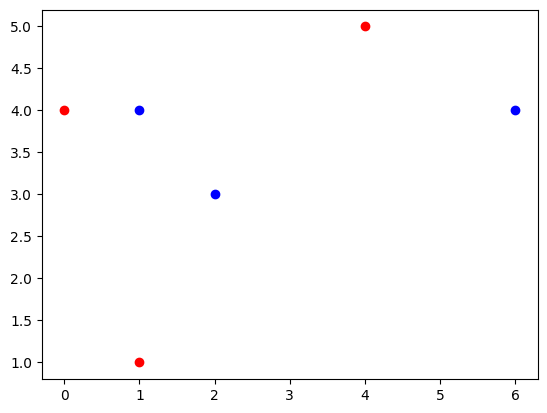

In [3]:
p = [[2, 3], [4, 5], [1,1], [0, 4], [6, 4], [1, 4]]
centers, cost = kcenters.kcenter(p, k=3)

for idx, i in enumerate(p):
    colour = 'blue'
    if idx in centers:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print(cost)
plt.show()

#### Unfair k-Centers on the dataset

Time taken for Degree 3 - 0.086 seconds.
Time taken for Degree 4 - 0.125 seconds.
Time taken for Degree 5 - 0.184 seconds.
Time taken for Degree 6 - 0.262 seconds.
Time taken for Degree 7 - 0.337 seconds.
Time taken for Degree 8 - 0.456 seconds.
Time taken for Degree 9 - 0.485 seconds.
Time taken for Degree 10 - 0.629 seconds.
Time taken for Degree 11 - 0.691 seconds.
Time taken for Degree 12 - 0.848 seconds.
Time taken for Degree 13 - 0.974 seconds.
Time taken for Degree 14 - 1.203 seconds.
Time taken for Degree 15 - 1.245 seconds.
Time taken for Degree 16 - 0.956 seconds.
Time taken for Degree 17 - 0.978 seconds.
Time taken for Degree 18 - 1.019 seconds.
Time taken for Degree 19 - 1.186 seconds.
Time taken for Degree 20 - 1.364 seconds.


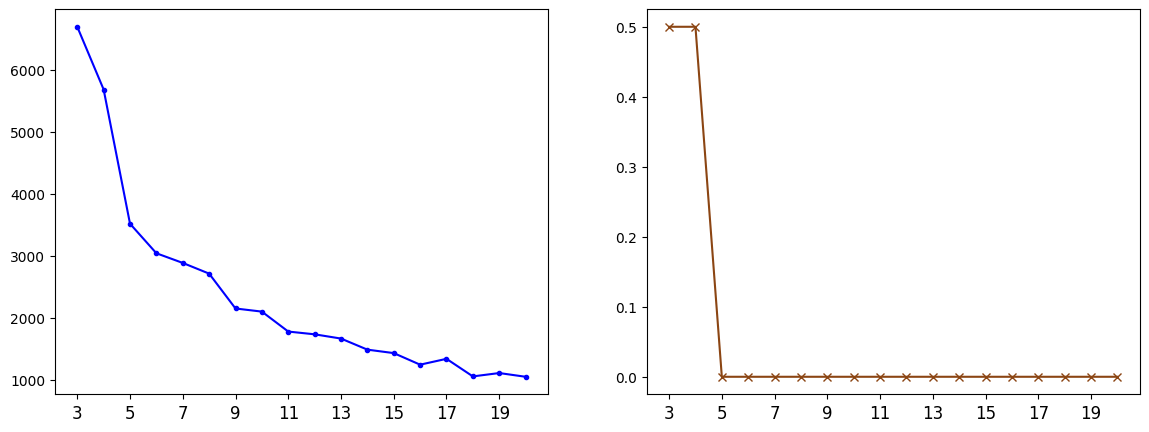

In [5]:
unfair_degrees = []
unfair_costs = []
unfair_balances = []

for degree in range(3, degrees+1, 1):
    start_time = time.time()
    centers, cost = kcenters.kcenter(data_list, degree)
    mapping = kcenters.p2c()
    unfair_degrees.append(degree)
    unfair_costs.append(cost)
    unfair_balances.append(balance(data_list, centers, mapping))
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(unfair_degrees, unfair_costs, unfair_balances, step_size=2)

### Vanilla Fairlet Decomposition

Time taken for Degree 1 - 0.026 seconds.
Time taken for Degree 2 - 0.045 seconds.
Time taken for Degree 3 - 0.060 seconds.
Time taken for Degree 4 - 0.070 seconds.
Time taken for Degree 5 - 0.107 seconds.
Time taken for Degree 6 - 0.156 seconds.
Time taken for Degree 7 - 0.196 seconds.
Time taken for Degree 8 - 0.240 seconds.
Time taken for Degree 9 - 0.268 seconds.
Time taken for Degree 10 - 0.271 seconds.
Time taken for Degree 11 - 0.401 seconds.
Time taken for Degree 12 - 0.418 seconds.
Time taken for Degree 13 - 0.460 seconds.
Time taken for Degree 14 - 0.505 seconds.
Time taken for Degree 15 - 0.564 seconds.
Time taken for Degree 16 - 0.663 seconds.
Time taken for Degree 17 - 0.687 seconds.
Time taken for Degree 18 - 0.791 seconds.
Time taken for Degree 19 - 0.923 seconds.
Time taken for Degree 20 - 0.798 seconds.


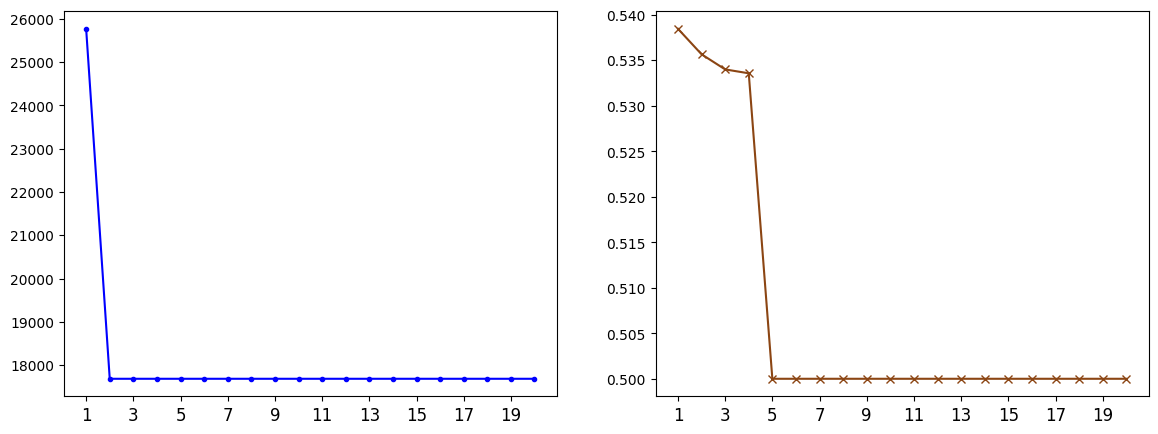

In [6]:
from valinna_fairlet import init_valinna,decompose
init_valinna(data_list, 1, 2, blues, reds)

vanilla_fairlets, vanilla_fairlet_centers, vanilla_fairlet_costs = decompose()
vanilla_degrees, vanilla_costs, vanilla_balances = run_experiments(degrees, data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers)
plot_analysis(vanilla_degrees, vanilla_costs, vanilla_balances, step_size=2)

### MCF Fairlet Decomposition

In [7]:
from mcf_fairlet import init, gen_dist, gen_graph, gen_fairlet, gen_misc
init(data_list, blues, reds, 2, dist_threshold)
gen_dist()
gen_graph()
fairlets = gen_fairlet()
print('fairlets complete')
mcf_fairlets, mcf_fairlet_centers, mcf_fairlet_costs = gen_misc(fairlets)

fairlets complete


## Final Comparison Plot

Time taken for Degree 1 - 0.027 seconds.
Time taken for Degree 2 - 0.049 seconds.
Time taken for Degree 3 - 0.074 seconds.
Time taken for Degree 4 - 0.098 seconds.
Time taken for Degree 5 - 0.122 seconds.
Time taken for Degree 6 - 0.157 seconds.
Time taken for Degree 7 - 0.179 seconds.
Time taken for Degree 8 - 0.236 seconds.
Time taken for Degree 9 - 0.253 seconds.
Time taken for Degree 10 - 0.283 seconds.
Time taken for Degree 11 - 0.375 seconds.
Time taken for Degree 12 - 0.374 seconds.
Time taken for Degree 13 - 0.478 seconds.
Time taken for Degree 14 - 0.553 seconds.
Time taken for Degree 15 - 0.600 seconds.
Time taken for Degree 16 - 0.703 seconds.
Time taken for Degree 17 - 0.749 seconds.
Time taken for Degree 18 - 0.790 seconds.
Time taken for Degree 19 - 0.568 seconds.
Time taken for Degree 20 - 0.673 seconds.


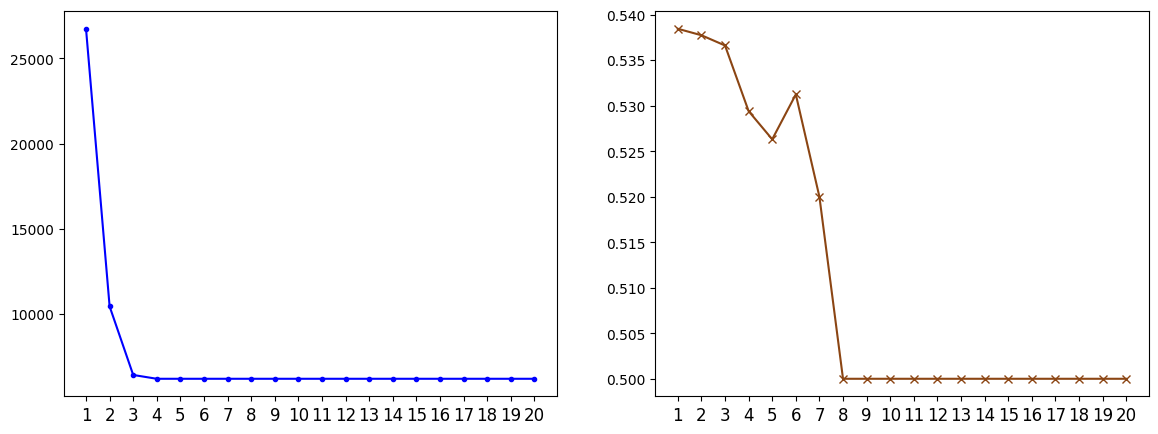

In [8]:
mcf_degrees, mcf_costs, mcf_balances = run_experiments(degrees, data_list, mcf_fairlets, mcf_fairlet_centers)
plot_analysis(mcf_degrees, mcf_costs, mcf_balances, step_size=1)

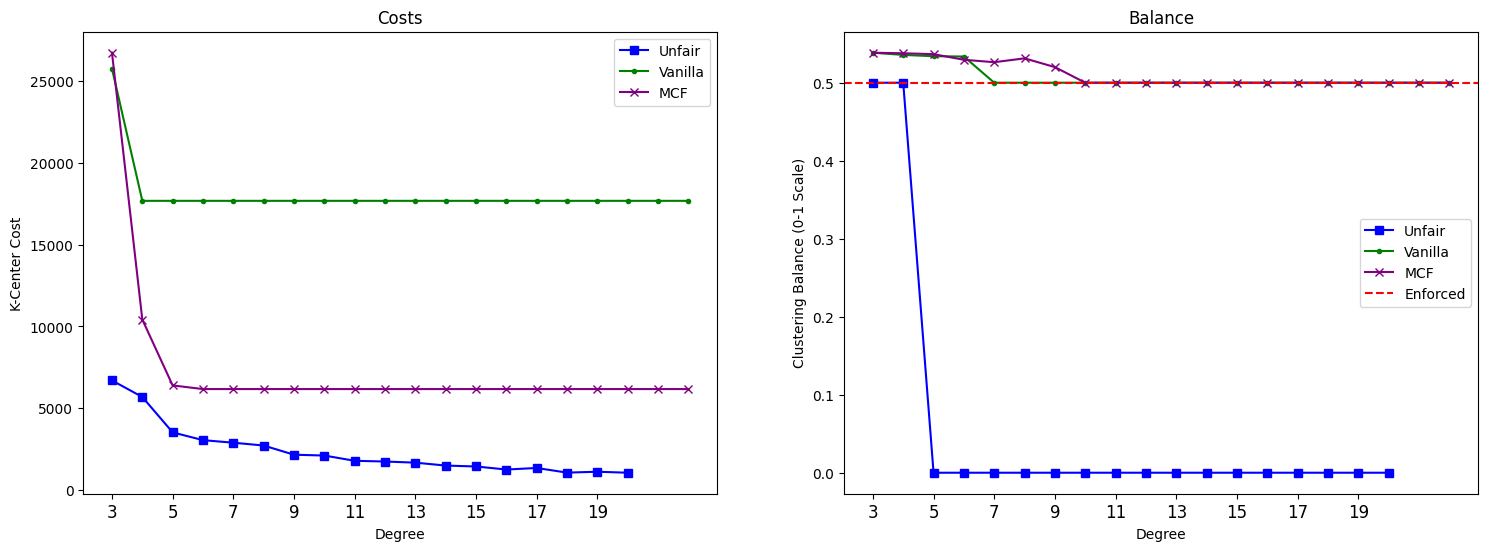

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(unfair_costs, marker='s', color='blue', label="Unfair")
ax[0].plot(vanilla_costs, marker='.', color='green', label="Vanilla")
ax[0].plot(mcf_costs, marker='x', color='purple', label="MCF")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 2))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 2)), fontsize=12)
ax[0].set_title("Costs")
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("K-Center Cost")
ax[0].legend()
ax[1].plot(unfair_balances, marker='s', color='blue', label="Unfair")
ax[1].plot(vanilla_balances, marker='.', color='green', label="Vanilla")
ax[1].plot(mcf_balances, marker='x', color='purple', label="MCF")
ax[1].axhline(0.5, color='red', linestyle='--', label="Enforced")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 2))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 2)), fontsize=12)
ax[1].set_title("Balance")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("Clustering Balance (0-1 Scale)")
ax[1].legend()
plt.show()